In [4]:
import numpy as np

from stable_baselines3 import PPO
from PO_grid_world import PO_GridWorld
from notebook_env_wrapper import NotebookEnvWrapper
from stable_baselines3.common.evaluation import evaluate_policy

In [5]:
env_po = PO_GridWorld(partially_observable=True)
env_notebook = NotebookEnvWrapper(PO_GridWorld(partially_observable=True), notebook_size=8)

In [12]:
n = 3

mean_episode_lengths_po = []
std_episode_lengths_po = []
mean_rewards_po = []
std_rewards_po = []

for i in range(n):
    model = PPO.load(f"models_cmp/ppo_gridworld_po_{i}")
    rewards, lengths = evaluate_policy(model, env_po, n_eval_episodes=1000, return_episode_rewards=True)

    mean_episode_length = np.mean(lengths)
    std_episode_length = np.std(lengths)
    mean_reward = np.mean(rewards)
    std_reward = np.std(rewards)

    mean_episode_lengths_po.append(mean_episode_length)
    std_episode_lengths_po.append(std_episode_length)
    mean_rewards_po.append(mean_reward)
    std_rewards_po.append(std_reward)
    print(f"PO Model {i}: {mean_reward:.2f} +/- {std_reward:.2f}, mean episode length: {mean_episode_length:.2f} +/- {std_episode_length:.2f}")

c:\Users\User\anaconda3\envs\Notebook\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


PO Model 0: 0.73 +/- 0.68, mean episode length: 74.25 +/- 62.11
PO Model 1: 0.76 +/- 0.65, mean episode length: 74.83 +/- 58.65
PO Model 2: 0.79 +/- 0.61, mean episode length: 77.00 +/- 61.07


In [14]:
n = 3

mean_episode_lengths_notebook = []
std_episode_lengths_notebook = []
mean_rewards_notebook = []
std_rewards_notebook = []

for i in range(n):
    model = PPO.load(f"models_cmp/ppo_gridworld_notebook_{i}")
    rewards, lengths = evaluate_policy(model, env_notebook, n_eval_episodes=1000, return_episode_rewards=True)
    
    mean_episode_length = np.mean(lengths)
    std_episode_length = np.std(lengths)
    mean_reward = np.mean(rewards)
    std_reward = np.std(rewards)

    mean_episode_lengths_notebook.append(mean_episode_length)
    std_episode_lengths_notebook.append(std_episode_length)
    mean_rewards_notebook.append(mean_reward)
    std_rewards_notebook.append(std_reward)
    print(f"Notebook Model {i}: {mean_reward:.2f} +/- {std_reward:.2f}, mean episode length: {mean_episode_length:.2f} +/- {std_episode_length:.2f}")

Notebook Model 0: 0.88 +/- 0.48, mean episode length: 25.52 +/- 24.12
Notebook Model 1: 0.85 +/- 0.52, mean episode length: 25.95 +/- 27.14
Notebook Model 2: 0.87 +/- 0.49, mean episode length: 26.49 +/- 27.94


In [15]:
print("PO models")
print(f"Mean episode length: {np.mean(mean_episode_lengths_po):.2f} +/- {np.mean(std_episode_lengths_po):.2f}")
print(f"Mean reward: {np.mean(mean_rewards_po):.2f} +/- {np.mean(std_rewards_po):.2f}")
print("Notebook models")
print(f"Mean episode length: {np.mean(mean_episode_lengths_notebook):.2f} +/- {np.mean(std_episode_lengths_notebook):.2f}")
print(f"Mean reward: {np.mean(mean_rewards_notebook):.2f} +/- {np.mean(std_rewards_notebook):.2f}")

PO models
Mean episode length: 75.36 +/- 60.61
Mean reward: 0.76 +/- 0.65
Notebook models
Mean episode length: 25.99 +/- 26.40
Mean reward: 0.87 +/- 0.50


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Normal vs Notebook Models')

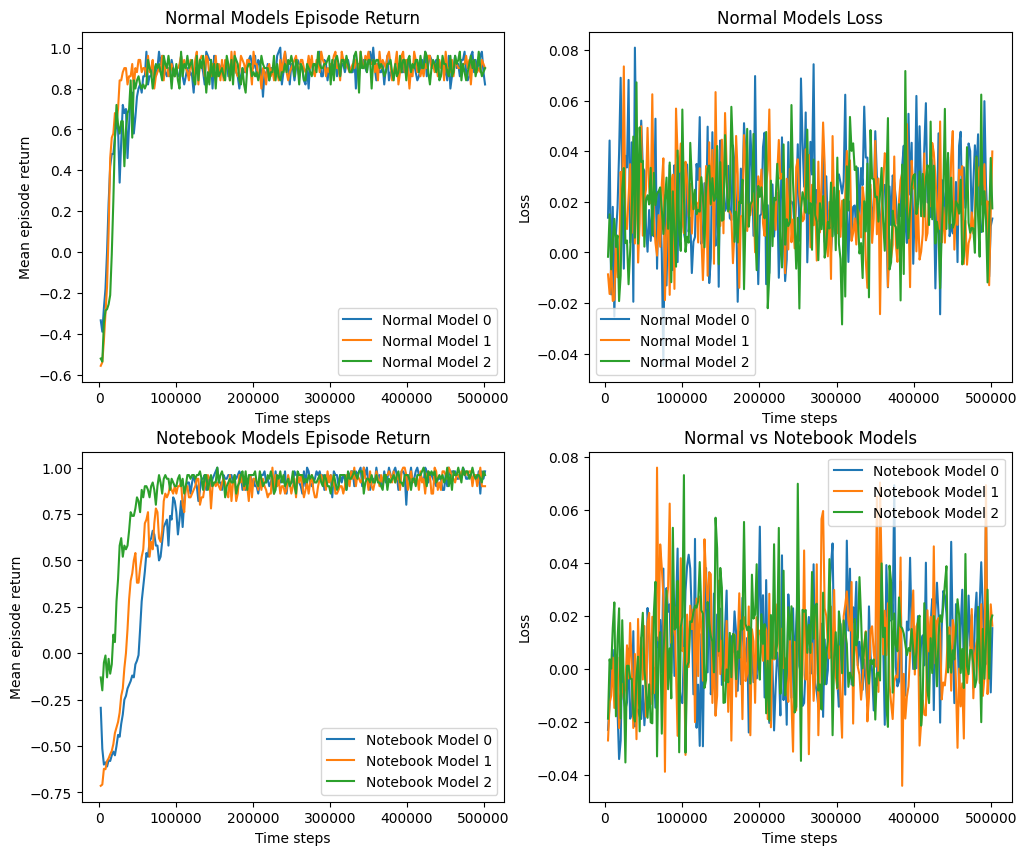

In [ ]:
# 2x2 grid of plots
plt.figure(figsize=(12, 10))

plt.subplot(221)
for i in range(n):
    po_df = pd.read_csv(f"logs/ppo_gridworld_po_{i}/progress.csv")
    time = po_df["time/total_timesteps"]
    reward = po_df["rollout/ep_rew_mean"]
    plt.plot(time, reward, label=f"Normal Model {i}")

plt.xlabel("Time steps")
plt.ylabel("Mean episode return")
plt.legend()
plt.title("Normal Models Episode Return")

plt.subplot(222)
for i in range(n):
    po_df = pd.read_csv(f"logs/ppo_gridworld_po_{i}/progress.csv")
    time = po_df["time/total_timesteps"]
    loss = po_df["train/loss"]
    plt.plot(time, loss, label=f"Normal Model {i}")

plt.xlabel("Time steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Normal Models Loss")

plt.subplot(223)
for i in range(n):
    notebook_df = pd.read_csv(f"logs/ppo_gridworld_notebook_{i}/progress.csv")
    time = notebook_df["time/total_timesteps"]
    reward = notebook_df["rollout/ep_rew_mean"]
    plt.plot(time, reward, label=f"Notebook Model {i}")

plt.xlabel("Time steps")
plt.ylabel("Mean episode return")
plt.legend()
plt.title("Notebook Models Episode Return")

plt.subplot(224)
for i in range(n):
    notebook_df = pd.read_csv(f"logs/ppo_gridworld_notebook_{i}/progress.csv")
    time = notebook_df["time/total_timesteps"]
    loss = notebook_df["train/loss"]
    plt.plot(time, loss, label=f"Notebook Model {i}")

plt.xlabel("Time steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Notebook Models Loss")
